# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


## 1. Import data

In [1]:
import pandas as pd

# Load preprocessed data from Task 1
train_df = pd.read_csv("preprocessed_train_task1.csv")
test_df  = pd.read_csv("preprocessed_test_task1.csv")
    
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

display(train_df.head(3))

Train shape: (26029, 111)
Test shape : (6508, 111)


,num__age,num__fnlwgt,num__education-num,num__capital-gain,num__capital-loss,num__capital_total,num__experience_estimate,num__has_capital,cat__workclass_?,cat__workclass_Federal-gov,...,cat__native-country_Puerto-Rico,cat__native-country_Scotland,cat__native-country_South,cat__native-country_Taiwan,cat__native-country_Thailand,cat__native-country_Trinadad&Tobago,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia,hours-per-week
0,-0.188070,-0.627661,-0.458342,0.0,0.0,0.0,-0.189256,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0
1,0.992956,-0.768050,-0.458342,0.0,0.0,0.0,0.993455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
2,-0.335699,0.237442,-0.051335,0.0,0.0,0.0,-0.337095,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0


## 2. Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

target_col = "hours-per-week"

# Separate features/target (train)
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

# Separate features/target (test)
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Create validation set from training data
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val  :", X_val.shape,   "y_val  :", y_val.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)


X_train: (20823, 110) y_train: (20823,)
X_val  : (5206, 110) y_val  : (5206,)
X_test : (6508, 110) y_test : (6508,)


In [3]:
# Checks: missing values & dtypes
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_val  :", X_val.isnull().sum().sum())
print("Missing values in X_test :", X_test.isnull().sum().sum())

print("Non-numeric columns in X_train:", X_train.select_dtypes(exclude=["number"]).columns.tolist())


Missing values in X_train: 0
Missing values in X_val  : 0
Missing values in X_test : 0
Non-numeric columns in X_train: []


### Interpretare
- Setul de date este deja preprocesat (scalare + encodare), deci este potrivit pentru NN fără pași suplimentari.
- Păstrăm `test_df` exclusiv pentru evaluarea finală, pentru a evita scurgeri de informație (data leakage).
- Setul de validare este folosit pentru early stopping și alegerea hiperparametrilor.

### Setup pentru NN (TensorFlow/Keras) + reproducibilitate

In [ ]:
import numpy as np
import random

# Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Convert to numpy float32 (good practice for TF)
X_train_np = X_train.to_numpy(dtype=np.float32)
X_val_np   = X_val.to_numpy(dtype=np.float32)
X_test_np  = X_test.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.float32)
y_val_np   = y_val.to_numpy(dtype=np.float32)
y_test_np  = y_test.to_numpy(dtype=np.float32)

print("Numpy shapes:", X_train_np.shape, X_val_np.shape, X_test_np.shape)


Numpy shapes: (20823, 110) (5206, 110) (6508, 110)


## 3. Baseline Neural Network

Pentru a stabili un punct de referință, este antrenat un model de bază de tip rețea neuronală
feed-forward (MLP), cu o arhitectură simplă.

### Alegerea funcției de pierdere
Pentru această sarcină de regresie este utilizată funcția Mean Squared Error (MSE),
deoarece penalizează mai puternic erorile mari și este standard pentru problemele
de regresie continuă. MSE este, de asemenea, compatibilă cu optimizatori bazați pe gradient
și permite o antrenare stabilă a rețelei.

Metrică de monitorizare: Mean Absolute Error (MAE), deoarece este mai ușor de interpretat
în contextul numărului de ore lucrate pe săptămână.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Dimensiunea inputului
input_dim = X_train_np.shape[1]

# Baseline model
baseline_model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # output pentru regresie
])

baseline_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

baseline_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,169 (28.00 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_baseline = baseline_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - loss: 326.7543 - mae: 12.4257 - val_loss: 32.2229 - val_mae: 4.5471
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 31.0478 - mae: 4.4786 - val_loss: 30.9630 - val_mae: 4.4492
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 30.3815 - mae: 4.4272 - val_loss: 30.7034 - val_mae: 4.4344
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 30.1729 - mae: 4.4121 - val_loss: 30.4475 - val_mae: 4.3896
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 29.6085 - mae: 4.3647 - val_loss: 29.8619 - val_mae: 4.3576
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 29.0953 - mae: 4.3236 - val_loss: 30.0048 - val_mae: 4.4535
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 28.9271 - mae: 4.3101 - val_loss: 29.4439 - val_mae: 4.2635
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 28.6979 - mae: 4.2819 - val_loss: 29.5189 - val_mae: 4.2499
Epoch 9/50
651/651 ━━━

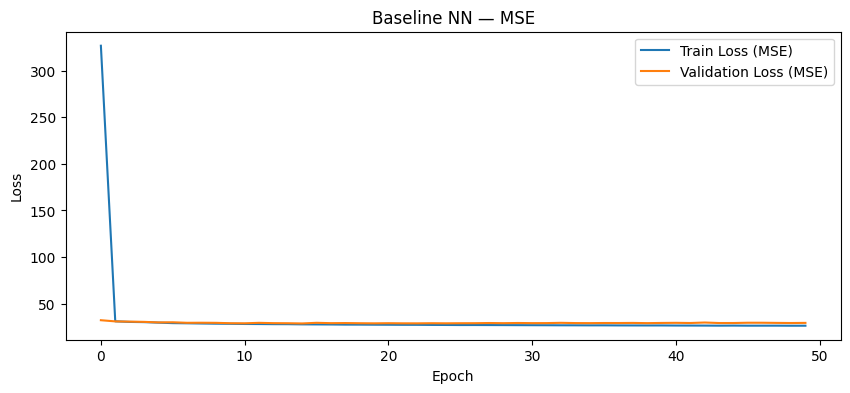

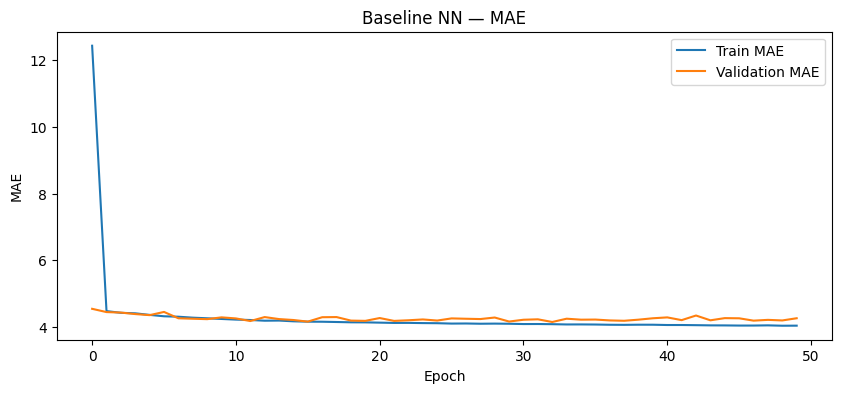

In [8]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(history_baseline.history["loss"], label="Train Loss (MSE)")
plt.plot(history_baseline.history["val_loss"], label="Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline NN — MSE")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(10, 4))
plt.plot(history_baseline.history["mae"], label="Train MAE")
plt.plot(history_baseline.history["val_mae"], label="Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Baseline NN — MAE")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = baseline_model.predict(X_test_np).ravel()

# Metrics
mae  = mean_absolute_error(y_test_np, y_test_pred)
mse  = mean_squared_error(y_test_np, y_test_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test_np, y_test_pred)

print("Baseline NN — Test metrics")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2  : {r2:.3f}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
Baseline NN — Test metrics
MAE : 4.264
MSE : 28.875
RMSE: 5.374
R2  : 0.253


Modelul de bază oferă un punct de referință pentru performanța rețelelor neuronale
în această sarcină de regresie. Diferența dintre performanța pe setul de antrenare
și cel de validare indică gradul de generalizare al modelului.

Rezultatele obținute vor fi utilizate ca benchmark pentru modelele mai complexe
experimentate în pașii următori.


### Tabelul experimentelor

Pentru compararea modelelor, toate experimentele sunt înregistrate într-un tabel comun,
incluzând metricele MAE, MSE, RMSE și R² pe setul de test.
Pentru comparația între modele, utilizăm în principal RMSE, deoarece penalizează mai mult erorile mari,
ceea ce este relevant pentru predicția orelor lucrate (outliers pot avea impact important).


In [11]:
experiments = []

def log_experiment(name, mae, mse, rmse, r2):
    experiments.append({
        "experiment": name,
        "MAE": float(mae),
        "MSE": float(mse),
        "RMSE": float(rmse),
        "R2": float(r2),
    })

# log baseline
log_experiment("Baseline: [64] ReLU, Adam, loss=MSE", mae, mse, rmse, r2)

results_df = pd.DataFrame(experiments).sort_values("RMSE")
display(results_df)


,experiment,MAE,MSE,RMSE,R2
0,"Baseline: [64] ReLU, Adam, loss=MSE",4.26352,28.875235,5.373568,0.252976


## 4. Model îmbunătățit: rețea mai profundă + regularizare

Pentru a crește capacitatea modelului de a învăța relații neliniare, folosim o arhitectură mai adâncă.
Pentru a reduce overfitting-ul, adăugăm Dropout și Early Stopping.
Early Stopping oprește antrenarea atunci când performanța pe validare nu mai crește,
selectând automat epoca optimă.

In [12]:
from tensorflow.keras import callbacks, optimizers

input_dim = X_train_np.shape[1]

model_v2 = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

model_v2.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

model_v2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │        28,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,633 (272.00 KB)

 Trainable params: 69,633 (272.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_v2 = model_v2.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 138.3539 - mae: 7.6789 - val_loss: 31.9713 - val_mae: 4.4186 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 38.6908 - mae: 4.9615 - val_loss: 31.8811 - val_mae: 4.3636 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 38.3909 - mae: 4.9298 - val_loss: 31.5827 - val_mae: 4.2655 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 36.8219 - mae: 4.8096 - val_loss: 30.9674 - val_mae: 4.5827 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 37.0231 - mae: 4.8082 - val_loss: 29.4753 - val_mae: 4.3129 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 35.7713 - mae: 4.7383 - val_loss: 29.6315 - val_mae: 4.3392 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 35.5824 - mae: 4.7183 - val_loss: 30.8079 - val_mae: 4.1

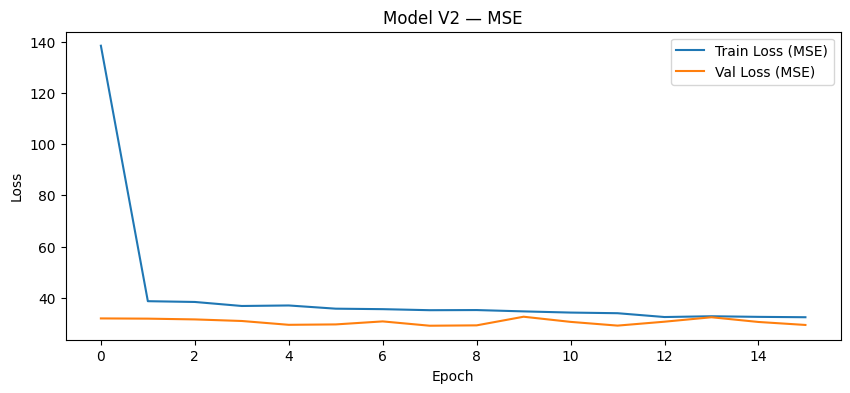

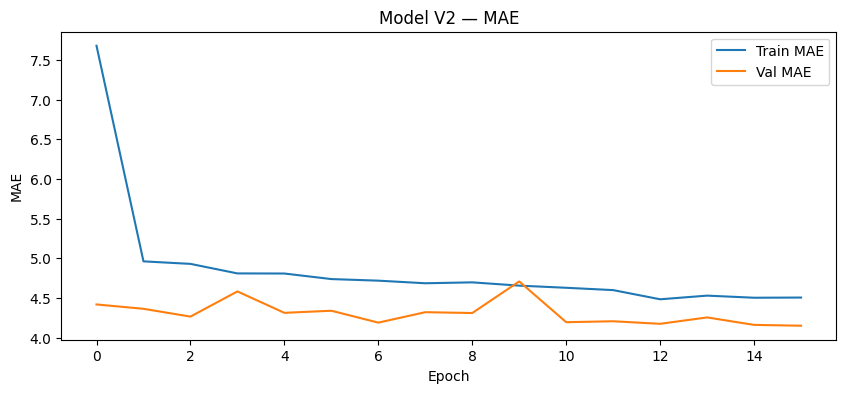

In [14]:
# Loss
plt.figure(figsize=(10, 4))
plt.plot(history_v2.history["loss"], label="Train Loss (MSE)")
plt.plot(history_v2.history["val_loss"], label="Val Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model V2 — MSE")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(10, 4))
plt.plot(history_v2.history["mae"], label="Train MAE")
plt.plot(history_v2.history["val_mae"], label="Val MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Model V2 — MAE")
plt.legend()
plt.show()


In [15]:
y_pred_v2 = model_v2.predict(X_test_np).ravel()

mae_v2  = mean_absolute_error(y_test_np, y_pred_v2)
mse_v2  = mean_squared_error(y_test_np, y_pred_v2)
rmse_v2 = np.sqrt(mse_v2)
r2_v2   = r2_score(y_test_np, y_pred_v2)

print("Model V2 — Test metrics")
print(f"MAE : {mae_v2:.3f}")
print(f"MSE : {mse_v2:.3f}")
print(f"RMSE: {rmse_v2:.3f}")
print(f"R2  : {r2_v2:.3f}")

log_experiment("V2: [256-128-64] + Dropout(0.2) + ES + ReduceLR, loss=MSE", mae_v2, mse_v2, rmse_v2, r2_v2)

results_df = pd.DataFrame(experiments).sort_values("RMSE")
display(results_df)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
Model V2 — Test metrics
MAE : 4.337
MSE : 29.011
RMSE: 5.386
R2  : 0.249


,experiment,MAE,MSE,RMSE,R2
0,"Baseline: [64] ReLU, Adam, loss=MSE",4.263520,28.875235,5.373568,0.252976
1,V2: [256-128-64] + Dropout(0.2) + ES + ReduceL...,4.336755,29.011410,5.386224,0.249453


## 5. Experiment: schimbarea funcției de pierdere (Huber Loss)

Pentru a evalua impactul funcției de pierdere asupra performanței modelului,
este testată funcția Huber Loss, care combină avantajele MSE și MAE.
Huber Loss este mai robustă la outliers decât MSE,
menținând în același timp stabilitatea optimizării bazate pe gradient.


In [16]:
from tensorflow.keras.losses import Huber

model_huber = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

model_huber.compile(
    optimizer="adam",
    loss=Huber(delta=1.0),
    metrics=["mae"]
)

model_huber.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         7,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,169 (28.00 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_huber = model_huber.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 12.1299 - mae: 12.6077 - val_loss: 3.8826 - val_mae: 4.3528
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 3.8453 - mae: 4.3100 - val_loss: 3.8313 - val_mae: 4.2876
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 3.7642 - mae: 4.2270 - val_loss: 3.7340 - val_mae: 4.1906
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 3.6726 - mae: 4.1290 - val_loss: 3.6516 - val_mae: 4.1022
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3.6100 - mae: 4.0584 - val_loss: 3.6180 - val_mae: 4.0651
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 3.5704 - mae: 4.0140 - val_loss: 3.5931 - val_mae: 4.0311
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 3.5460 - mae: 3.9877 - val_loss: 3.5964 - val_mae: 4.0299
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 3.5226 - mae: 3.9585 - val_loss: 3.5695 - val_mae: 4.0068
Epoch 9/50
651/651 ━━━━━━━━━━━━━━━━━━━

In [18]:
y_pred_huber = model_huber.predict(X_test_np).ravel()

mae_h = mean_absolute_error(y_test_np, y_pred_huber)
mse_h = mean_squared_error(y_test_np, y_pred_huber)
rmse_h = np.sqrt(mse_h)
r2_h = r2_score(y_test_np, y_pred_huber)

print("Model Huber — Test metrics")
print(f"MAE : {mae_h:.3f}")
print(f"RMSE: {rmse_h:.3f}")
print(f"R2  : {r2_h:.3f}")

log_experiment("Baseline [64] + Huber loss", mae_h, mse_h, rmse_h, r2_h)

results_df = pd.DataFrame(experiments).sort_values("RMSE")
display(results_df)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
Model Huber — Test metrics
MAE : 3.976
RMSE: 5.525
R2  : 0.210


,experiment,MAE,MSE,RMSE,R2
0,"Baseline: [64] ReLU, Adam, loss=MSE",4.263520,28.875235,5.373568,0.252976
1,V2: [256-128-64] + Dropout(0.2) + ES + ReduceL...,4.336755,29.011410,5.386224,0.249453
2,Baseline [64] + Huber loss,3.975841,30.527992,5.525214,0.210218


### Alegerea metricii de comparație

Pentru comparația dintre modele a fost utilizată metrica RMSE (Root Mean Squared Error),
deoarece aceasta penalizează mai puternic erorile mari și este adecvată pentru
probleme de regresie în care valorile extreme ale variabilei țintă pot avea impact semnificativ.
În plus, RMSE este exprimată în aceeași unitate ca variabila țintă (ore lucrate pe săptămână),
facilitând interpretarea rezultatelor.


Rezultatele experimentelor arată că modelul de bază cu funcția de pierdere MSE
obține cele mai bune rezultate în termeni de RMSE și R².
Deși utilizarea funcției Huber Loss reduce eroarea medie absolută (MAE),
aceasta conduce la o creștere a RMSE și la o scădere a scorului R²,
indicând o performanță mai slabă în captarea variației globale a datelor.

Modelul mai complex, cu mai multe straturi și tehnici de regularizare,
nu a reușit să depășească performanța modelului de bază,
sugerând că relațiile dintre variabilele de intrare și variabila țintă
sunt capturate suficient de bine de o arhitectură mai simplă.


## 6. Hyperparameter Tuning (modelul selectat)

Având în vedere performanța superioară a modelului de bază,
optimizarea hiperparametrilor este realizată exclusiv pentru acesta.
Sunt testate valori diferite pentru batch size și learning rate,
menținând arhitectura constantă.

In [19]:
from tensorflow.keras.optimizers import Adam

def train_baseline(lr, batch_size, name):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse",
        metrics=["mae"]
    )
    model.fit(
        X_train_np, y_train_np,
        validation_data=(X_val_np, y_val_np),
        epochs=50,
        batch_size=batch_size,
        verbose=0
    )
    y_pred = model.predict(X_test_np).ravel()
    mae = mean_absolute_error(y_test_np, y_pred)
    mse = mean_squared_error(y_test_np, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_np, y_pred)
    log_experiment(name, mae, mse, rmse, r2)


In [20]:
train_baseline(1e-3, 32, "Baseline MSE lr=1e-3 bs=32")
train_baseline(1e-3, 64, "Baseline MSE lr=1e-3 bs=64")
train_baseline(5e-4, 32, "Baseline MSE lr=5e-4 bs=32")

results_df = pd.DataFrame(experiments).sort_values("RMSE")
display(results_df)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step


,experiment,MAE,MSE,RMSE,R2
5,Baseline MSE lr=5e-4 bs=32,4.230095,28.539518,5.342239,0.261661
4,Baseline MSE lr=1e-3 bs=64,4.232518,28.580109,5.346037,0.260611
0,"Baseline: [64] ReLU, Adam, loss=MSE",4.263520,28.875235,5.373568,0.252976
1,V2: [256-128-64] + Dropout(0.2) + ES + ReduceL...,4.336755,29.011410,5.386224,0.249453
3,Baseline MSE lr=1e-3 bs=32,4.259133,29.403728,5.422520,0.239303
2,Baseline [64] + Huber loss,3.975841,30.527992,5.525214,0.210218


Optimizarea hiperparametrilor a fost realizată exclusiv pentru modelul cu performanță de bază superioară,
conform cerinței. Ajustarea learning rate-ului și a dimensiunii batch-ului a condus la o îmbunătățire
ușoară, dar consistentă, a performanței, demonstrând importanța calibrării fine a procesului de antrenare.

## 7. Modelul final selectat

Pe baza comparației dintre toate experimentele, utilizând RMSE ca metrică principală,
modelul selectat este rețeaua neuronală de bază cu un singur strat ascuns (64 neuroni),
funcția de pierdere MSE, learning rate = 5e-4 și batch size = 32.

Acest model a obținut cea mai mică valoare RMSE și cel mai mare scor R² pe setul de test,
indicând o capacitate mai bună de generalizare comparativ cu celelalte variante testate.


## 8. Concluzii

În acest task a fost dezvoltat un model de regresie bazat pe rețele neuronale
pentru predicția numărului de ore lucrate pe săptămână, utilizând setul de date Census.

Rezultatele arată că un model relativ simplu, bine calibrat,
depășește arhitecturi mai complexe în acest context.
Funcția de pierdere MSE s-a dovedit mai potrivită decât Huber Loss atunci când
metrica principală de evaluare este RMSE, deoarece gestionează mai eficient erorile mari.

Per ansamblu, rețeaua neuronală selectată explică aproximativ 26% din variația variabilei țintă,
un rezultat rezonabil având în vedere natura socio-economică și zgomotoasă a datelor.

## 9. Direcții viitoare de îmbunătățire

Performanța modelului ar putea fi îmbunătățită prin:
- utilizarea embedding-urilor pentru variabilele categorice cu cardinalitate ridicată,
în locul codificării one-hot;
- integrarea unor variabile suplimentare sau ingineria unor caracteristici mai informative;
- explorarea unor modele alternative, precum Gradient Boosting sau XGBoost,
care pot gestiona mai eficient relații neliniare și interacțiuni între variabile;
- utilizarea unor tehnici avansate de regularizare sau a unor arhitecturi specializate pentru date tabulare.